Copyright **`(c)`** 2024 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

In [1]:
from itertools import accumulate
from icecream import ic
import numpy as np
from tqdm.auto import tqdm
from matplotlib import pyplot as plt

# 0-1 Multiple Knapsack Problem

see: [https://en.wikipedia.org/wiki/Knapsack_problem](https://en.wikipedia.org/wiki/Knapsack_problem)

In [12]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [13]:
NUM_ITEMS = 1000
DIMENSIONS = 500
MAX_STEPS = 20_000
36
WEIGHTS = np.random.randint(1, 50 + 1, size=(NUM_ITEMS, DIMENSIONS))
MAX_WEIGHTS = np.full(DIMENSIONS, NUM_ITEMS * 20)
VALUES = np.random.randint(1, 100 + 1, size=NUM_ITEMS)

In [14]:
def evaluate(knapsack):
    if all(np.sum(WEIGHTS[knapsack], axis=0) < MAX_WEIGHTS):
        return np.sum(VALUES[knapsack])
    else:
        return -1

## Random-Mutation Hill Climber

  0%|          | 0/20000 [00:00<?, ?it/s]

ic| evaluate(solution): np.int64(37396)
ic| history.index(evaluate(solution)): 1544


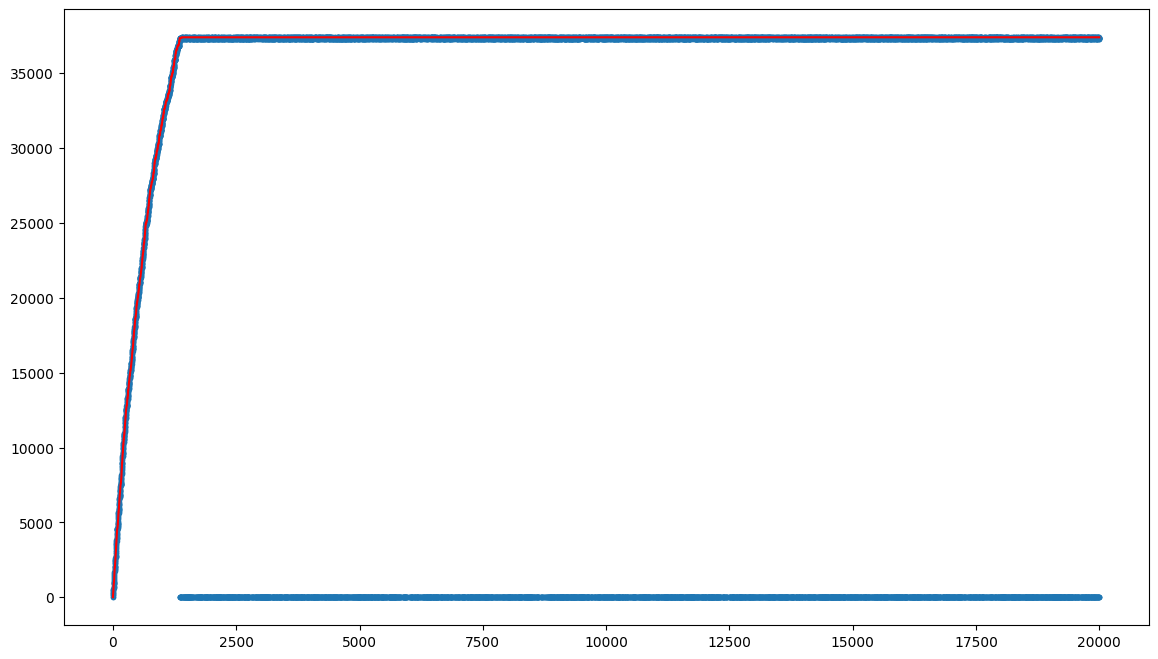

In [15]:
solution = np.full(NUM_ITEMS, False)
history = [evaluate(solution)]
for n in tqdm(range(MAX_STEPS)):
    # TWEAK!
    new_solution = solution.copy()
    index = np.random.randint(0, NUM_ITEMS)
    new_solution[index] = not new_solution[index]

    history.append(evaluate(new_solution))
    if evaluate(new_solution) > evaluate(solution):
        solution = new_solution

# That's all...
ic(evaluate(solution))
ic(history.index(evaluate(solution)))

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")

## RMHC with a more powerful tweak

In [16]:
def tweak(solution):
    new_solution = solution.copy()
    index = None
    while index is None or np.random.random() < 0.4:
        index = np.random.randint(0, NUM_ITEMS)
        new_solution[index] = not new_solution[index]
    return new_solution

  0%|          | 0/20000 [00:00<?, ?it/s]

ic| evaluate(solution): np.int64(44328)
ic| history.index(evaluate(solution)): 19941


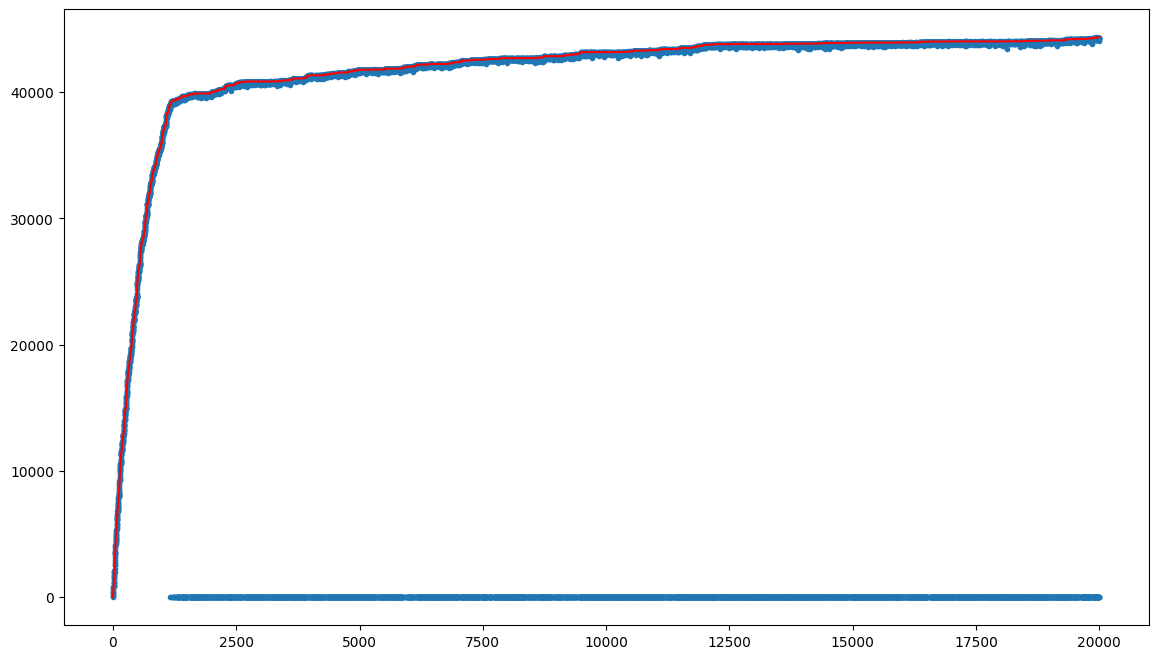

In [17]:
solution = np.full(NUM_ITEMS, False)

history = [evaluate(solution)]
for n in tqdm(range(MAX_STEPS)):
    new_solution = tweak(solution)
    history.append(evaluate(new_solution))
    if evaluate(new_solution) > evaluate(solution):
        solution = new_solution

# That's all...
ic(evaluate(solution))
ic(history.index(evaluate(solution)))

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")

In [18]:
def evaluate(knapsack):
    if all(np.sum(WEIGHTS[knapsack], axis=0) < MAX_WEIGHTS):
        return np.sum(VALUES[knapsack])
    else:
        return -sum(np.sum(WEIGHTS[knapsack], axis=0) > MAX_WEIGHTS)

  0%|          | 0/20000 [00:00<?, ?it/s]

ic| evaluate(solution): np.int64(44527)
ic| history.index(evaluate(solution)): 19518


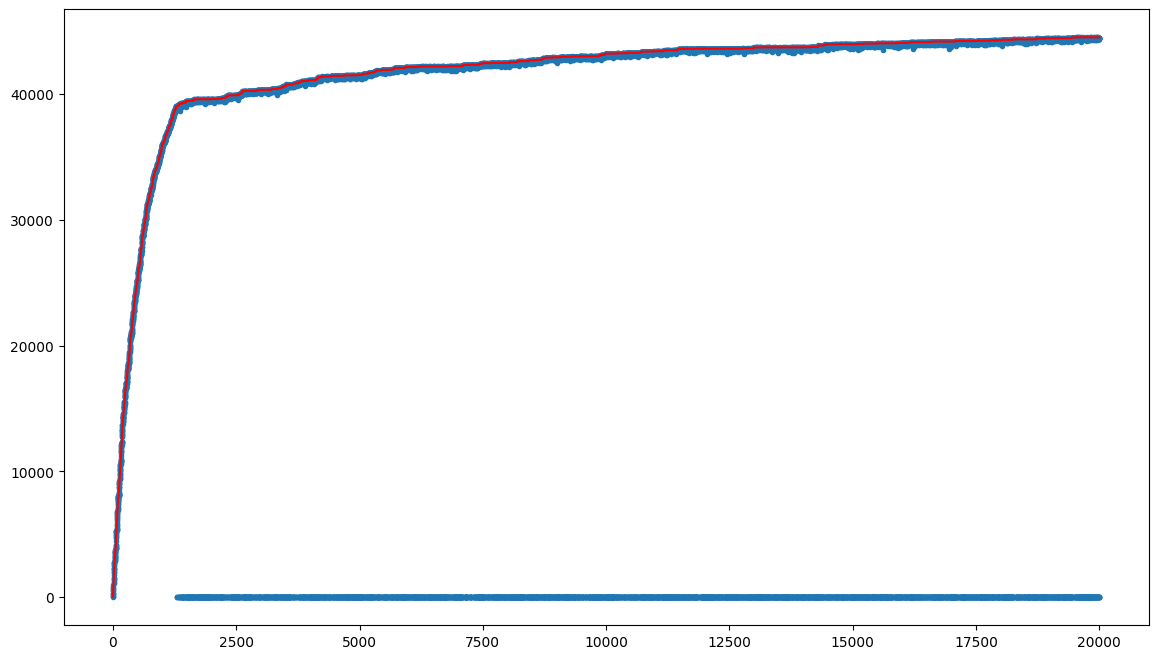

In [19]:
solution = np.full(NUM_ITEMS, False)

history = [evaluate(solution)]
for n in tqdm(range(MAX_STEPS)):
    new_solution = tweak(solution)
    history.append(evaluate(new_solution))
    if evaluate(new_solution) > evaluate(solution):
        solution = new_solution

# That's all...
ic(evaluate(solution))
ic(history.index(evaluate(solution)))

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")

## Steepest Step and Restart

In [ ]:
NUM_RESTARTS = 3
STEEPEST_STEP_CANDIDATES = 5
TRUE_MAX_STEPS = MAX_STEPS // STEEPEST_STEP_CANDIDATES

max_value = -1
num_steps = 0
history = list()

for i in tqdm(range(NUM_RESTARTS), position=0):
    solution = np.full(NUM_ITEMS, False)  # restarts the solution
    history.append(evaluate(solution))

    last_improvement = (0, 0)
    new_solution = solution

    for n in tqdm(range(TRUE_MAX_STEPS // NUM_RESTARTS), position=1, desc=f'step {i+1}'):
        # create candidate solutions and evaluate them
        candidates = [tweak(solution) for i in range(STEEPEST_STEP_CANDIDATES)]
        candidates_fitness = list()
        for c in candidates:
            f = evaluate(c)
            history.append(f)
            candidates_fitness.append(f)
        idx = candidates_fitness.index(max(candidates_fitness))

        # keep candidate solution that yielded the steepest ascent
        new_solution = candidates[idx]
        new_fitness = candidates_fitness[idx]
        num_steps += STEEPEST_STEP_CANDIDATES

        if new_fitness > evaluate(solution):
            # logging.info(f"Whoa! After {n:,} found value={value(new_solution):,}")
            solution = new_solution

    ic(evaluate(solution))

    if evaluate(solution) > max_value:
        max_value = evaluate(solution)
        best_solution = solution

# That's all...
ic(evaluate(best_solution))
ic(history.index(evaluate(best_solution)))

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")

In [ ]:
MAX_STEPS // NUM_RESTARTS